# Import Library

In [ ]:
import pandas as pd  # Import pandas for data manipulation and analysis

from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder for one-hot encoding categorical features
from sklearn.model_selection import train_test_split  # Import train_test_split function

from sklearn.metrics import accuracy_score # Import accuracy_score for accuracy calculation
import matplotlib.pyplot as plt  # Import matplotlib for data visualization
import seaborn as sns  # Import seaborn for statistical data visualization
from sklearn.metrics import confusion_matrix  # Import confusion_matrix for evaluating classification performance
from sklearn.metrics import classification_report  # Import classification_report for detailed classification metrics

from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV  # Importing the GridSearchCV module for hyperparameter tuning

# Load Data

In [ ]:
# Load dataset
df = pd.read_csv("productOnline.csv")
df.sample(5)

,brand,product name,class,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,OS,warranty
410,HP,250 G9 7M659PA Laptop,B,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel Integrated,15.6,Windows 11 OS,1
845,Zebronics,ZEB-NBC 2S Laptop,A,11th Gen Intel Core i5 1155G7,"Quad Core, 8 Threads",16GB,LPDDR4X,512GB,SSD,Intel Integrated UHD,15.6,Windows 11 OS,1
165,Asus,TUF Gaming F17 FX706HF-HX019W Laptop,C,11th Gen Intel Core i5 11400H,"Hexa Core, 12 Threads",16GB,DDR4,512GB,SSD,4GB NVIDIA GeForce RTX 2050,17.3,Windows 11 OS,1
431,HP,15S-FQ5202TU Laptop,B,12th Gen Intel Core i5 1235U,"10 Cores (2P + 8E), 12 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,15.6,Windows 11 OS,1
527,HP,Pavilion Plus ?16-ab0456TX Laptop,D,13th Gen Intel Core i7 13700H,"14 Cores (6P + 8E), 20 Threads",16GB,DDR4,1TB,SSD,6GB NVIDIA GeForce RTX 3050,16.0,Windows 11 OS,2


# Preprocessing

In [ ]:
# Show dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         848 non-null    object 
 1   product name  848 non-null    object 
 2   class         848 non-null    object 
 3   processor     848 non-null    object 
 4   CPU           848 non-null    object 
 5   Ram           848 non-null    object 
 6   Ram_type      848 non-null    object 
 7   ROM           848 non-null    object 
 8   ROM_type      848 non-null    object 
 9   GPU           848 non-null    object 
 10  display_size  848 non-null    float64
 11  OS            848 non-null    object 
 12  warranty      848 non-null    int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 86.2+ KB


In [ ]:
# Assume feature and class name
feature_names = df.drop(labels=['class'], axis=1).columns.tolist()
class_names = df['class'].unique().tolist()

# Print the list of feature names
print("Feature Names:")
print(feature_names)

# Print the list of class names
print("\nClass Names:")
print(class_names)

Feature Names:
['brand', 'product name', 'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU', 'display_size', 'OS', 'warranty']

Class Names:
['A', 'B', 'C', 'D']


In [ ]:
# Lower cases data and count possible instances

# Function to lower cases data
def lower_cases_data(df) :
  for i in df.columns :
    if  df.loc[:,i].dtype == 'O':
      df.loc[:,i] = df.loc[:,i].str.lower()

# Function to count possible instances
def count_possible_instances(df) :
  for i in df.columns :
    print(i, ":", df.loc[:,i].value_counts())
    print("-------------------------------------")

# Call lower_cases_data function and count_possible_instances function
lower_cases_data(df)
count_possible_instances(df)

brand : hp           175
lenovo       165
asus         153
dell          98
acer          84
msi           59
samsung       26
infinix       15
apple          9
xiaomi         8
lg             8
gigabyte       8
fujitsu        6
zebronics      4
ultimus        4
tecno          3
wings          3
realme         3
chuwi          3
honor          2
axl            2
microsoft      2
huawei         2
primebook      1
razer          1
ninkear        1
vaio           1
walker         1
avita          1
Name: brand, dtype: int64
-------------------------------------
product name : inspiron 3525 laptop                 4
inspiron 3511 laptop                 4
megabook t1 laptop                   3
vostro 3425 laptop                   3
galaxy book2 15 laptop               3
                                    ..
inspiron 14 5430 2023 laptop         1
inspiron 5425 laptop                 1
inspiron 5518 d560667win9s laptop    1
inspiron 5518 laptop                 1
pro series z zeb-nbc 4s laptop

In [ ]:
# Normalize whitespace
for i in range(len(df.columns)) :
  column_temp = df.iloc[:,i]
  if  column_temp.dtype == 'O' :
    for j in range(len(column_temp)) :
      data_temp = df.iloc[j,i].split()
      df.iloc[j,i] = " ".join(data_temp)

# Call count_possible_instances function to checkup data
count_possible_instances(df)

brand : hp           175
lenovo       165
asus         153
dell          98
acer          84
msi           59
samsung       26
infinix       15
apple          9
xiaomi         8
lg             8
gigabyte       8
fujitsu        6
zebronics      4
ultimus        4
tecno          3
wings          3
realme         3
chuwi          3
honor          2
axl            2
microsoft      2
huawei         2
primebook      1
razer          1
ninkear        1
vaio           1
walker         1
avita          1
Name: brand, dtype: int64
-------------------------------------
product name : inspiron 3525 laptop                 4
inspiron 3511 laptop                 4
megabook t1 laptop                   3
vostro 3425 laptop                   3
galaxy book2 15 laptop               3
                                    ..
inspiron 14 5430 2023 laptop         1
inspiron 5425 laptop                 1
inspiron 5518 d560667win9s laptop    1
inspiron 5518 laptop                 1
pro series z zeb-nbc 4s laptop

In [ ]:
# Create an instance of OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Use OneHotEncoder with categorical data
df_encoded = pd.DataFrame(onehot_encoder.fit_transform(df[feature_names]))

# Create new feature names by combining original feature names with "_" and original data
onehot_columns = onehot_encoder.get_feature_names_out(feature_names)

# Create a DataFrame with the one-hot encoded features and the 'class' column
df_encoded = pd.DataFrame(onehot_encoder.fit_transform(df[feature_names]), columns=onehot_columns)
df_encoded['class'] = df['class']

# Encode string data (Target)
dic = {'a': 0, 'b': 1, 'c' : 2, 'd' : 3}
df_encoded['class'] = df_encoded['class'].map(dic)

# Show a sample of df_encoded
df_encoded.head(5)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,brand_acer,brand_apple,brand_asus,brand_avita,brand_axl,brand_chuwi,brand_dell,brand_fujitsu,brand_gigabyte,brand_honor,...,OS_mac high sierra os,OS_mac os,OS_ubuntu os,OS_windows 10 os,OS_windows 11 os,OS_windows os,warranty_1,warranty_2,warranty_3,class
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0


In [ ]:
# Define X and y : X is feature. y is answer lable of X.
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Train Test Split

In [ ]:
# Dividing the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15  , random_state=680) # 85% training and 15% test

# Find the Best Hyperparameters

In [ ]:
# Define a dictionary 'grid' where each key represents a hyperparameter's name,
# and the corresponding value is a list of values to compare during the grid search
grid = {
    'n_neighbors': [4, 5, 6, 7, 8, 9]
}

# Creating an instance of the KNeighborsClassifier
classifier = KNeighborsClassifier()

# Creating an instance of GridSearchCV with the KNeighborsClassifier and hyperparameter grid
classifier_cv = GridSearchCV(classifier, grid, cv = 10)  # 10-fold Cross-Validation

# Fitting the GridSearchCV instance to the training data
classifier_cv.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:",classifier_cv.best_params_)

Best Parameters: {'n_neighbors': 6}


# Create the best model and evaluate

In [ ]:
# Get the best KNeighborsClassifier model with the optimal hyperparameters
best_classifier = classifier_cv.best_estimator_

# Train the KNeighborsClassifier with the best hyperparameters on the entire training set
best_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = best_classifier.predict(X_test)

# Evaluate the performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8203125


# Show confusion matrix

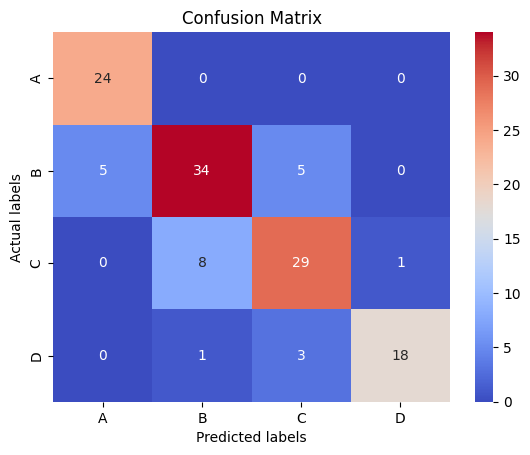

In [ ]:
# Show confusion matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a subplot
ax = plt.subplot()

# Display the confusion matrix as a heatmap with annotations
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")

# Set the title and axis labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted labels")
ax.set_ylabel("Actual labels")

# Set tick labels for both axes using class names
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

# Show the plot
plt.show()

In [ ]:
# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=class_names, digits=4)
print(report)

              precision    recall  f1-score   support

           A     0.8276    1.0000    0.9057        24
           B     0.7907    0.7727    0.7816        44
           C     0.7838    0.7632    0.7733        38
           D     0.9474    0.8182    0.8780        22

    accuracy                         0.8203       128
   macro avg     0.8374    0.8385    0.8347       128
weighted avg     0.8225    0.8203    0.8190       128

